# Breast Cancer Classification Using K-Means Clustering

## Import Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans

In [2]:
feature_name=['Sample code number','Clump Thickness','Uniformity of Cell Size','Uniformity of Cell Shape','Marginal Adhesion','Single Epithelial Cell Size','Bare Nuclei','Bland Chromatin','Normal Nucleol','Mitoses','Class']

In [3]:
df=pd.read_csv('data.csv')
df.tail()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
564,926424,M,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,...,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115,NaN
565,926682,M,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,...,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637,NaN
566,926954,M,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,...,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820,NaN
567,927241,M,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,...,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400,NaN
568,92751,B,7.76,24.54,47.92,181.0,0.05263,0.04362,0.00000,0.00000,...,30.37,59.16,268.6,0.08996,0.06444,0.0000,0.0000,0.2871,0.07039,NaN


In [4]:
df.shape

(569, 33)

In [5]:
#Checking the ratio of the types in diagnosis variable
df['diagnosis'].value_counts()

B    357
M    212
Name: diagnosis, dtype: int64

In [6]:
df.describe()

,id,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
count,5.690000e+02,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,...,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,0.0
mean,3.037183e+07,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,...,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946,NaN
std,1.250206e+08,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,...,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061,NaN
min,8.670000e+03,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,...,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040,NaN
25%,8.692180e+05,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,...,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460,NaN
50%,9.060240e+05,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,...,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040,NaN
75%,8.813129e+06,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,...,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080,NaN
max,9.113205e+08,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,...,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500,NaN


In [7]:
#Checkig for nulll data
df.isnull().sum()

id                           0
diagnosis                    0
radius_mean                  0
texture_mean                 0
perimeter_mean               0
area_mean                    0
smoothness_mean              0
compactness_mean             0
concavity_mean               0
concave points_mean          0
symmetry_mean                0
fractal_dimension_mean       0
radius_se                    0
texture_se                   0
perimeter_se                 0
area_se                      0
smoothness_se                0
compactness_se               0
concavity_se                 0
concave points_se            0
symmetry_se                  0
fractal_dimension_se         0
radius_worst                 0
texture_worst                0
perimeter_worst              0
area_worst                   0
smoothness_worst             0
compactness_worst            0
concavity_worst              0
concave points_worst         0
symmetry_worst               0
fractal_dimension_worst      0
Unnamed:

In [8]:
# Fixing the data and the target
data=df.drop(columns=['Unnamed: 32','diagnosis'])
target=df['diagnosis']

In [9]:
#Scaling the datasets
scaler=StandardScaler()
scaled_data=scaler.fit_transform(data)

#### Converting to 3d data using PCA

In [10]:
#Applying PCA for dimension reduction
pca = PCA(n_components=3)
pca.fit(scaled_data)
trans_data=pca.transform(scaled_data)

In [11]:
print(trans_data.shape)

(569, 3)


## Visualizing the data

/home/pooja/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:4: MatplotlibDeprecationWarning: Support for uppercase single-letter colors is deprecated since Matplotlib 3.1 and will be removed in 3.3; please use lowercase instead.
  after removing the cwd from sys.path.


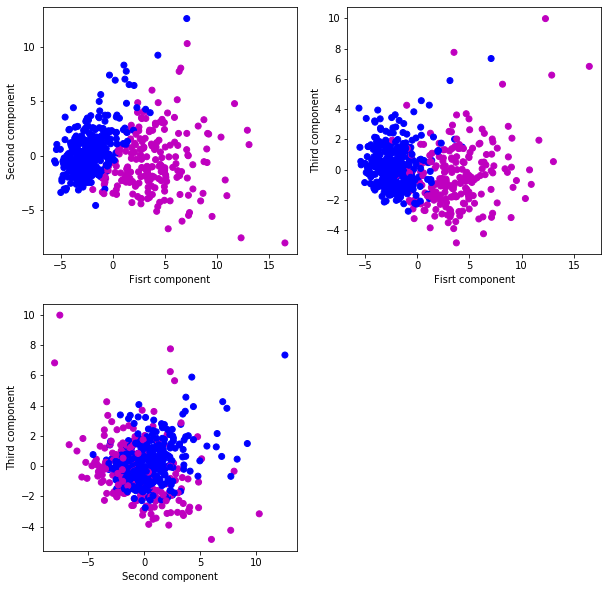

In [12]:
plt.figure(figsize=(10,10))
#First vs second
plt.subplot(221)
plt.scatter(trans_data[:,0],trans_data[:,1],c=target)
plt.xlabel('Fisrt component')
plt.ylabel('Second component')

#First vs Third
plt.subplot(222)
plt.scatter(trans_data[:,0],trans_data[:,2],c=target)
plt.xlabel('Fisrt component')
plt.ylabel('Third component')

#First vs Third
plt.subplot(223)
plt.scatter(trans_data[:,1],trans_data[:,2],c=target)
plt.xlabel('Second component')
plt.ylabel('Third component')

plt.show()

We can clearly male that in the First vs. Second plot the data points form some group ,which is clearly visisble , Therefore 2d dimentionality would work fine.

(array([ 17.,  96., 154., 145.,  89.,  40.,  21.,   4.,   2.,   1.]),
 array([-2.22924851, -1.54113476, -0.85302101, -0.16490726,  0.52320649,
         1.21132023,  1.89943398,  2.58754773,  3.27566148,  3.96377523,
         4.65188898]),
 <a list of 10 Patch objects>)

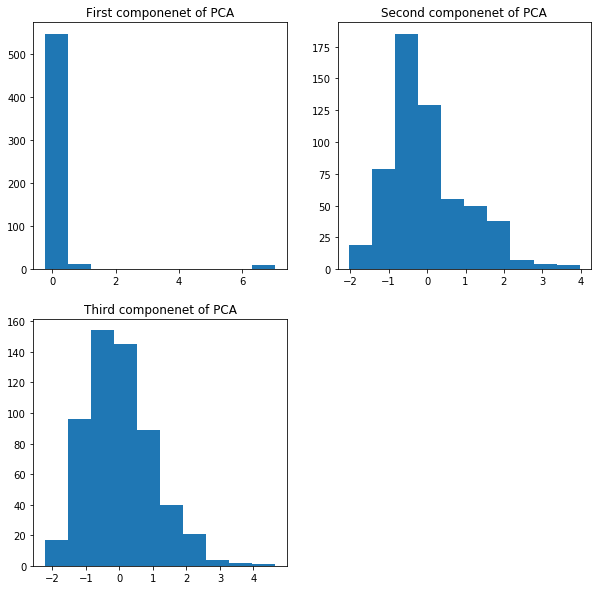

In [13]:
x=scaled_data[:,0]
y=scaled_data[:,1]
z=scaled_data[:,2]

plt.figure(figsize=(10,10))
plt.subplot(221)
plt.title('First componenet of PCA')
plt.hist(x)
plt.subplot(222)
plt.title('Second componenet of PCA')
plt.hist(y)
plt.subplot(223)
plt.title('Third componenet of PCA')
plt.hist(z)

Here we can see that the histogram of 2nd and the 3rd component of PCA will overlap , while that of 1st with 2nd and 3rd will not overlap that much and it is more good with the 1st and 2nd one

## K-Means Clustering

In [14]:
k_means=KMeans(n_clusters=2)
pred_clusters=k_means.fit_predict(trans_data)

In [15]:
#.inertia_ will give the sum of sqaured error (i.e sum of the squared of all the data points from the centroid)
k_means.inertia_

6943.2267334438675

Now lets see for which K it performs the best by plotting a curve between the SSE(sum of squared error) and K

In [16]:
k=[2,3,5]
error_list=[]
for k_val in k:
    k_means=KMeans(n_clusters=k_val)
    k_means.fit_predict(trans_data)
    error_list.append(k_means.inertia_)

In [17]:
pd.DataFrame(error_list,k)

,0
2,6943.226733
3,5439.664120
5,4069.948007


### Plotting curve between SSE and K

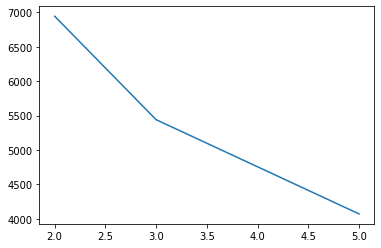

In [18]:
plt.plot(k,error_list)

#### We can see that at K=3 the SSE error is less
### Visualize the data and the centroid using k=3

In [19]:
k_means=KMeans(n_clusters=2)
pred_clusters=k_means.fit_predict(trans_data)
centers=k_means.cluster_centers_

In [20]:
df_new=pd.DataFrame(trans_data,columns=['col1','col2','col3'])
df_new['clusters']=pred_clusters
df_new.head()

,col1,col2,col3,clusters
0,9.183200,1.971271,-1.171625,1
1,2.383298,-3.753459,-0.580229,1
2,5.742472,-1.080350,-0.533088,1
3,7.124384,10.272225,-3.150161,1
4,3.945694,-1.959689,1.401177,1


In [21]:
data0=df_new[df_new['clusters']==0]
data1=df_new[df_new['clusters']==1]
#data2=df_new[df_new['clusters']==2]

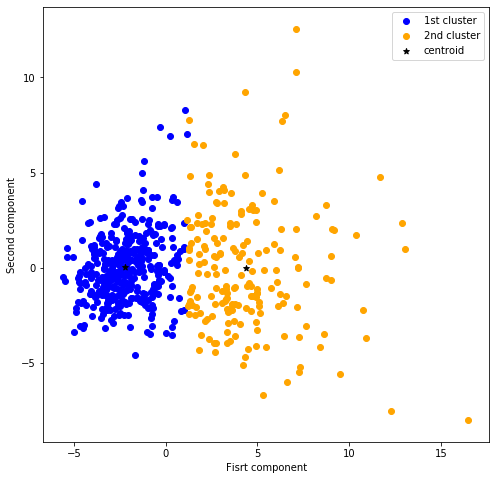

In [22]:
plt.figure(figsize=(8,8))
plt.scatter(data0['col1'],data0['col2'],color='blue',label='1st cluster')
plt.scatter(data1['col1'],data1['col2'],color='orange',label='2nd cluster')
#plt.scatter(data2['col1'],data2['col2'],color='red',label='3rd cluster')
plt.scatter(centers[:,0],centers[:,1],marker='*',color='black',label='centroid')
plt.xlabel('Fisrt component')
plt.ylabel('Second component')
plt.legend()

In [23]:
df_new.tail()

,col1,col2,col3,clusters
564,6.435329,-3.565358,2.399112,1
565,3.789458,-3.573419,2.029505,1
566,1.251890,-1.893977,0.534467,1
567,10.365035,1.696398,-1.907418,1
568,-5.478264,-0.672788,1.477165,0


In [24]:
from sklearn.metrics import classification_report, confusion_matrix

## Confusion Matrix

In [25]:
print(confusion_matrix(df_new['clusters'],k_means.labels_))

[[380   0]
 [  0 189]]


## Classification Report

In [26]:
print(classification_report(df_new['clusters'],k_means.labels_))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       380
           1       1.00      1.00      1.00       189

    accuracy                           1.00       569
   macro avg       1.00      1.00      1.00       569
weighted avg       1.00      1.00      1.00       569



In [27]:
df_new['clusters']=np.where(df_new['clusters']==1,'B','M')

In [28]:
df_new['clusters'].value_counts()

M    380
B    189
Name: clusters, dtype: int64

#### Thus we have obtained a model with great accuracy